<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Validasi_Performa_dengan_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

#   Memuat Data & Inisialisasi Model ---
X, y = load_diabetes(return_X_y=True)
model = Ridge(alpha=1.0) # Ridge adalah varian dari Regresi Linear

In [2]:
#   Lakukan Cross-Validation ---
# Menggunakan 10-fold CV untuk metrik R-squared
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Mendapatkan prediksi dari setiap fold
y_cv_pred = cross_val_predict(model, X, y, cv=10)

In [3]:
#   Cetak Hasil & Statistik CV ---
print("======= Hasil Cross-Validation (10-Fold) =======")
print(f"Skor R-squared per-Fold:\n{np.round(cv_scores, 4)}")
print(f"\nRata-rata Skor R-squared (Mean): {cv_scores.mean():.4f}")
print(f"Standar Deviasi Skor (Stdev): {cv_scores.std():.4f}")

======= Hasil Cross-Validation (10-Fold) =======
Skor R-squared per-Fold:
[0.4216 0.1684 0.358  0.5126 0.2849 0.5143 0.3882 0.4844 0.3965 0.5251]

Rata-rata Skor R-squared (Mean): 0.4054
Standar Deviasi Skor (Stdev): 0.1084


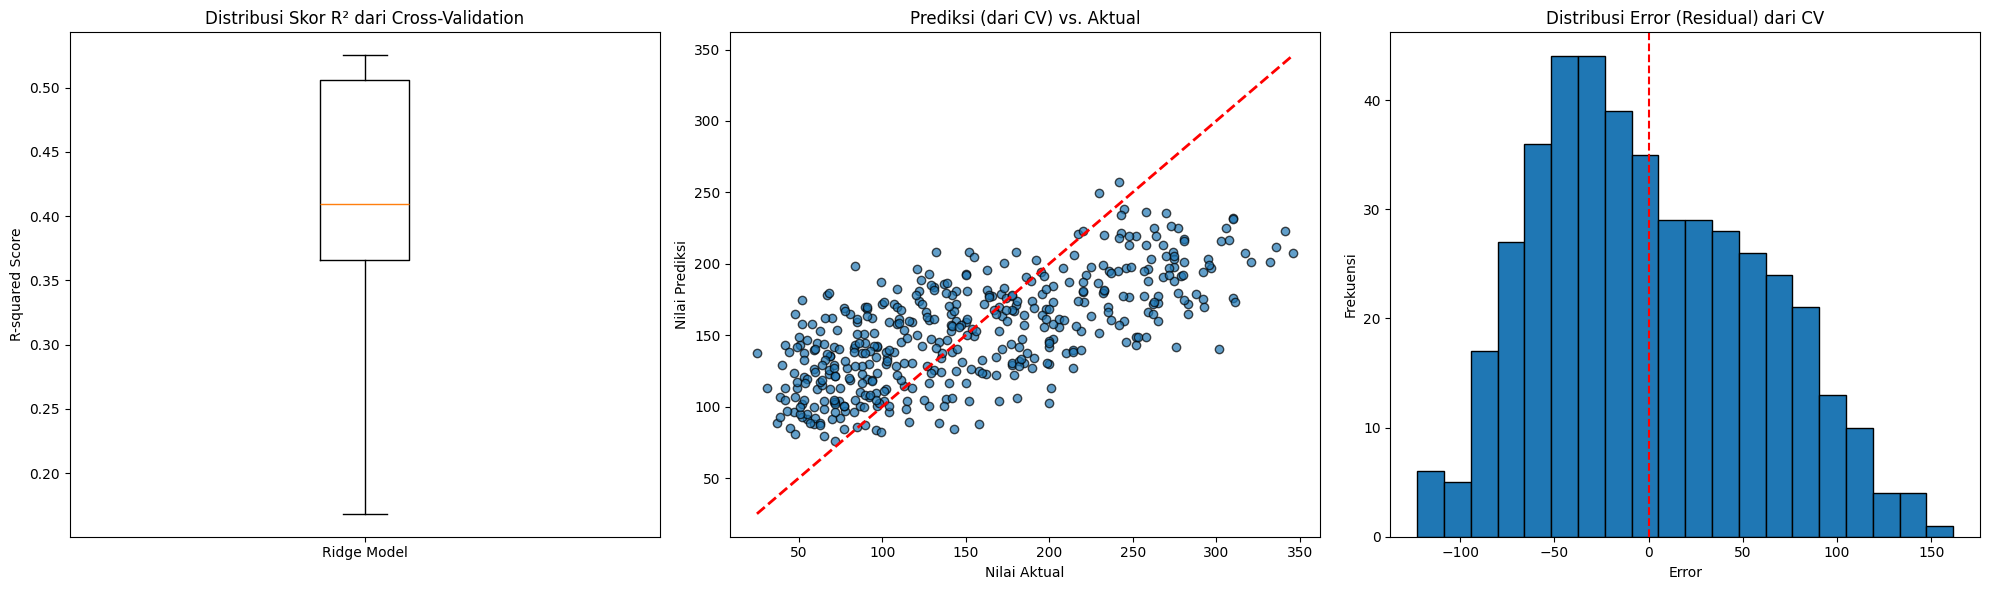

In [4]:
#   Tampilkan 3 Visualisasi ---
plt.figure(figsize=(20, 6))

# Visual 1: Box Plot Skor CV
plt.subplot(1, 3, 1)
plt.boxplot(cv_scores)
plt.title("Distribusi Skor R² dari Cross-Validation")
plt.ylabel("R-squared Score")
plt.xticks([1], ['Ridge Model'])

# Visual 2: Prediksi CV vs. Nilai Aktual
plt.subplot(1, 3, 2)
plt.scatter(y, y_cv_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)
plt.title("Prediksi (dari CV) vs. Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")

# Visual 3: Histogram Residual dari Prediksi CV
plt.subplot(1, 3, 3)
residuals = y - y_cv_pred
plt.hist(residuals, bins=20, edgecolor='k')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribusi Error (Residual) dari CV")
plt.xlabel("Error")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()